Equipo:
* Bravo Martínez Ariel Miguel - 10018737
* Ehrlich López Alexandra - 10018739
* Hernández Jaramillo Kevin - 10018742

# Breve introducción al Perceptrón

---
El Perceptron simple, también conocido una red neuronal de una sola capa (**Single-Layer Neural Network**), es un algoritmo de clasificación binaria creado por Frank Rosenblatt a partir del modelo neuronal de Warren McCulloch y Walter Pitts desarrollado en 1943.

---

La neurona recibe impulsos externos (consideradas las entradas - inputs) con distinta importancia (o pesos) en una función de activación. Si el estímulo agregado sobrepasa cierto umbral, la neurona se activa.


Matemáticamente, definimos x como el vector de estímulos y w como el vector de pesos, ambos m dimensiones, y z como la función de activación.

$$ w=[w1⋮wm],x=[x1⋮xm]$$ 

$$z= wT*x $$

$$z = w_1*x_1+…+ w_m*x_m $$

---

El perceptron ϕ(z) se considera activo cuando su valor es mayor o igual al umbral θ o inactivo en cualquier otro caso. Formalmente esta es una [función escalón](https://es.wikipedia.org/wiki/Funci%C3%B3n_escal%C3%B3n_de_Heaviside).

### La regla de aprendizaje

El perceptron tiene una regla de aprendizaje bastante simple que le permite ir ajustando los valores de los pesos (w). Para ello, se siguen los siguientes pasos:

1. Asignar un valor inicial a los pesos de 0 (cero) o valores pequeños al azar.
2. Para cada muestra de entrenamiento x(i) hacer lo siguiente
    * Computar el valor de salida y^.
    * Actualizar los pesos.

La actualización de los pesos se hace incrementando o disminuyéndolos en Δwj

$$w_j=w_j+Δw_j$$

$$Δw_j=η(y^i–\hat{y}^i)x_j^i$$

Donde:

* $η$ es la tasa de aprendizaje que es un valor entre 0 y 1.0
* $y^i$ es el valor real
* $\hat{y}^i$ es el valor de salida calculado (notar el sombrero en la y)
* $x_j^i$ es el valor de la muestra asociado

Esto implica que si el valor real y el valor calculado son el mismo, w no es actualizado o mejor dicho Δwj=0 . Sin embargo, si hubo un error en la predicción el valor será actualizado en la diferencia entre el valor real y el predicho, ajustado por el valor de la muestra y la tasa de aprendizaje.

## Implementando la regla del perceptron en python

Puedes descargar el cuaderno de Jupyter desde el repositorio en Github y así ir siguiendo esta implementación paso a paso.

Primero partiremos implementando un clase en python. Esta clase define los siguientes métodos:

* __init__: Define la tasa de aprendizaje del algoritmo y el numero de pasadas a hacer por el set de datos.
* fit: Implementa la regla de aprendizaje, definiendo inicialmente los pesos en 0 y luego ajustándolos a medida que calcula/predice el valor para cada fila del dataset.
* predict: Es la función escalón ϕ(z). Si el valor de z es mayor igual a 0,
    tiene por valor 1. En cualquier otro caso su valor es -1.
* net_input: Es la implementación de la función de activación z. Si se fijan en el código, hace producto punto en los vectores x y w.


In [1]:
import numpy as np
 
class Perceptron:
    """Clasificador Perceptron basado en la descripción del libro
    "Python Machine Learning" de Sebastian Raschka.
 
    Parametros
    ----------
 
    eta: float
        Tasa de aprendizaje.
    n_iter: int
        Pasadas sobre el dataset.
 
    Atributos
    ---------
    w_: array-1d
        Pesos actualizados después del ajuste
    errors_: list
        Cantidad de errores de clasificación en cada pasada
 
    """
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
 
    def fit(self, X, y):
        """Ajustar datos de entrenamiento
 
        Parámetros
        ----------
        X:  array like, forma = [n_samples, n_features]
            Vectores de entrenamiento donde n_samples es el número de muestras y
            n_features es el número de carácteristicas de cada muestra.
        y:  array-like, forma = [n_samples].
            Valores de destino
 
        Returns
        -------
        self:   object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
 
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
 
    def predict(self, X):
        """Devolver clase usando función escalón de Heaviside.
        phi(z) = 1 si z >= theta; -1 en otro caso
        """
        phi = np.where(self.net_input(X) >= 0.0, 1, -1)
        return phi
 
    def net_input(self, X):
        """Calcular el valor z (net input)"""
        # z = w · x + theta
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        return z

![img](https://media4.giphy.com/media/XcAa52ejGuNqdb5SFQ/giphy.gif)

## ¿Cómo hacer un perceptrón?

La estructura básica de un perceptrón es la siguiente:

    Inputs: Datos con los cuales quieres clasificar.
    Weights: Constantes que multiplican a incógnitas (inputs) de la ecuación.
    Bias: Constante que permite que se tome una decisión.
    Threshold: Punto que representa la división de las clasificaciones.
    Output: Predicción de la clasificación.
    
---

### Explicación general del proceso

Los inputs son los valores con los que esperas obtener una respuesta (output). Cada input es multiplicado por el correspondiente weight (los cuales inician con valor aleatorio), luego los resultados son sumados junto con una constante (bias). Si este resultado supera el threshold determina un output x, de lo contrario determina un output y.

![img](https://miro.medium.com/max/700/0*5fKjK9VwgX16PPp_)

---

Ahora, no solo se necesita eso, acabamos de ver que los weights iniciaron con valores aleatorios, cómo podrían valores aleatorios hacer predicciones? Pues se necesita entrenar a la neurona para modificar estos weights y obtener resultados precisos.

### División de los datos para el entrenamiento

Para el entrenamiento se necesitan datos, entre más datos, mejor. Siempre teniendo en cuenta que los datos deben ser significativos para el modelo.

La regla con la que trabajaremos es:
* 90% de los datos son para entrenar
* 10% de los datos son para verificar la precisión

---

La razón por la que se elige la proporción de 90:10 es porque los datos para el ejercicio que realizaremos son muy poquitos y necesitamos la mayor cantidad de datos para entrenar el modelo.

Nota Importante: Nunca verifiques la precisión del modelo con los datos con los que lo entrenaste, pues te estarías engañando a ti mismo.


## Ejercicios

Proseguiremos ahora con dos ejemplos, uno completamente a mano (el cual lo puedes hacer en una hoja de papel) y otro en Python a “mano” (sin librerías de machine learning).

### Ejercicio a mano

Haremos que un perceptrón entienda lo que es un operador AND de dos variables. En este ejemplo no haremos un set de entrenamiento y un set de verificación de datos porque son muy pocos datos (sólo son 4). Este ejercicio es más para entender qué está pasando con los cálculos. Es decir, recibirá dos entradas y nos dará una salida, como la siguiente tabla:

![img](https://miro.medium.com/max/327/0*JHgrPcQMDZxr2naT)

In [2]:
import numpy as np
import pandas as pd

d = {'x': [0,0,1,1], 'y': [0,1,0,1], 'z': [0,0,0,1]}
df = pd.DataFrame(data=d)
df

,x,y,z
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


Si graficamos los puntos en un plano, tomando X y Y como coordenadas, quedaría algo como lo siguiente:

![img](https://miro.medium.com/max/700/0*U24XRsEWlFjYuTjw)

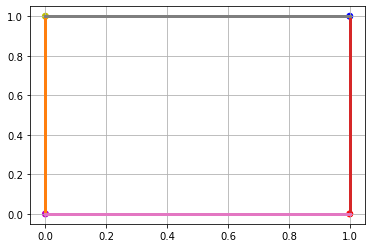

In [3]:
from pylab import *
import matplotlib.pyplot as plt

x = df.x
y = df.y
color=['m','y','r','b']
fig = plt.figure()
ax = fig.add_subplot(111)
scatter(x,y,marker='o', c=color)
[ plot( [dot_x,dot_x] ,[0,dot_y], '-', linewidth = 3 ) for dot_x,dot_y in zip(x,y) ] 
[ plot( [0,dot_x] ,[dot_y,dot_y], '-', linewidth = 3 ) for dot_x,dot_y in zip(x,y) ]
left,right = ax.get_xlim()
low,high = ax.get_ylim()
grid()
show()

Lo que buscamos es encontrar una ecuación que divida los puntos en base a su output, es decir los que tengan el output “0” pertenecen a un grupo y los que tengan el output “1" pertenecen al otro grupo, algo como lo siguiente:

![img](https://miro.medium.com/max/458/0*3_jfZSAhwJOSgSuA)

---

Ahora, esta recta puede ser representada por una ecuación, una ecuación tiene entradas ($x_i$) y a cada una la multiplicará un weight ($w_i$) y al final se le sumará una constante ($w_0$), la cual también es un peso. Nuestra ecuación solo tiene dos entradas ($X$ y $Y$), por lo que la ecuación queda de la siguiente forma:

$$W_1 * X_1 + W_2*X_2 * W_0*bias$$

---

Esta ecuación deberá ser la línea que divida las categorías y nos permita clasificar, es decir esta ecuación nos dará una predicción cuando se introduzcan las entradas $x_1$ y $x_2$. Iniciaremos nuestros weights de forma aleatoria...

Puedes sacar tus propios valores aleatorios o usar estos para no perderte en el procedimiento, los números generados aleatoriamente fueron: 0.03, 0.66 y 0.80.

In [4]:
#Ejemplo...
import numpy as np
np.random.random_sample(3).round(4)

array([0.2501, 0.7506, 0.8837])

---
A cada categoría se le será asociado un número (clase) que ayudará a ajustar los weights, un 1 y un -1, no importa cual escojas, sólo estamos determinando una clase a cada uno (y). Yo elegí -1 para el 0 y 1 para el 1. De la siguiente forma:

![img](https://miro.medium.com/max/378/1*_fwM-ujfeK2CDyora1IbAw.png)

### Reglas de ajuste de weights

Cuando sustituyamos los valores en la ecuación nos dará una predicción, si nos da lo que esperamos (**predicción de clase correcta**) no hacemos nada y continuamos con el siguiente conjunto de datos, si nos da algo diferente de lo que esperamos (**predicción de clase incorrecta**), debemos ajustar los weights.

Las decisiones para ajustar los weights son de la siguiente forma:

    Si el resultado de la ecuación es mayor o igual a 0, la predicción de la clase es 1.
    Si el resultado de la ecuación es menor a 0, la predicción de la clase es -1.
    
---

Las fórmulas para ajustar los weights son las siguientes:

$$ W_0 = W_0 + clase * bias $$

$$ W_n = W_n + clase * X_n $$

***Recuerda que la clase puede ser 1 o -1, el cual nos ayuda a entender la predicción del perceptrón.**

## Entrenamiento a mano

Empezaremos a introducir los datos en nuestra ecuación : $w_0 + w_1*x_1 + w_2*x_2$

---

* Primer conjunto de datos

Con $x_1$=0, $x_2$=0, $y$=0, $clase$ = -1

$0.03 + (0.66) * (0) + (0.8) * (0) = 0.03$ -> Predicción de clase: 1

In [5]:
x1 = 0
x2 = 0
y = 0
clase = -1

0.03 + (0.66)*x1 + (0.8)*x2 

0.03

La predicción de la clase fue 1 cuando esperamos -1, la predicción fue errónea, así que tenemos que ajustar los weights.

Ajuste de weights con las fórmulas antes mencionadas:

$w_0 = 0.03 + (-1)*1 = -0.97$

$w_1 = 0.66 + (-1)*(0) = 0.66$

$w_2 = 0.8 + (-1)*(0) = 0.8$

* Segundo conjunto de datos

Con $x_1$=0, $x_2$=1, $y$=0, $clase$ = -1

$- 0.97 + (0.66)*(0) + (0.8)*(1) = — 0.17$ -> Predicción de -1

In [6]:
x1 = 0
x2 = 1
y = 0
clase = -1

-0.97 + (0.66)*x1 + (0.8)*x2 

-0.16999999999999993

* Tercer conjunto de datos

Con $x_1$=1, $x_2$=0, $y$=0, $clase$ = -1

$- 0.97 + (0.66)*(1) + (0.8)*(0) = — 0.31$ -> Predicción de -1

---

* Cuarto conjunto de datos

Con $x_1$=1, $x_2$=1, $y$=1, $clase$ = 1

$- 0.97 + (0.66)*(1) + (0.8)*(1) = 0.49$ -> Predicción de 1

In [7]:
x1 = 1
x2 = 0
y = 0
clase = -1

print(-0.97 + (0.66)*x1 + (0.8)*x2)

x3 = 1
x4 = 1
y = 1
clase = 1

print(-0.97 + (0.66)*x3 + (0.8)*x4)

-0.30999999999999994
0.4900000000000001


Acabamos con todos los datos, pero uno fue erróneo, así que iniciaremos con otra época (presentación completa del dataset a aprender), lo que significa que volveremos a usar los datos de nuevo.

Primer conjunto de datos

Con $x_1$=0, $x_2$=0, $y$=0, $clase$ = -1

$- 0.97 + (0.66) * (0) + (0.8) * (0) = — 0.97 $-> Predicción de -1

---

Podríamos continuar pero la única predicción que nos faltaba acaba de ser correcta así que terminamos de ajustar los weights aquí.

---

### Pero **¿qué representan estos weights?** 

Pues son las constantes que multiplican a incógnitas (inputs) de la ecuación, sólo recuerda que el $w_0$ multiplica a un 1, es decir, es una constante. Podemos hacer la ecuación de una recta con estos weights, de la siguiente forma:

$- 0.97 + 0.66x + 0.8y$

En la cual podemos despejar la y para tener una ecuación más bonita:

$y = (0.97 - 0.66x) / 0.8$

$y = 1.2125 - 0.825 x$

-------

![img](https://miro.medium.com/max/700/1*BxtvMLDTxLYQwwpOGwszdA.png)

Cuando se obtenga la recta ahora sólo necesitamos evaluarla con los puntos y nos dirá de qué lado de la recta se encuentra, y así es como determinamos a qué clase pertenecen los puntos. Este ejemplo es un poco tramposo porque son muy pocos datos y cuando lo graficamos es totalmente comprensible, pero sirve para entender qué está pasando...

In [8]:
### Ejercicio con Python

import pandas as pd
import seaborn as sns 
  
iris = sns.load_dataset('iris') 
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [10]:
import random
data_with_two_species = iris.iloc[:100,:]
print(len(data_with_two_species))
print(type(data_with_two_species))
data_with_two_species

100
<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


In [11]:
from sklearn.utils import shuffle
data_with_two_species = shuffle(data_with_two_species)
data_with_two_species

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,setosa
69,5.6,2.5,3.9,1.1,versicolor
73,6.1,2.8,4.7,1.2,versicolor
63,6.1,2.9,4.7,1.4,versicolor
44,5.1,3.8,1.9,0.4,setosa
...,...,...,...,...,...
28,5.2,3.4,1.4,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
70,5.9,3.2,4.8,1.8,versicolor
40,5.0,3.5,1.3,0.3,setosa


In [12]:
data_training = data_with_two_species.iloc[:90, :]
data_verification = data_with_two_species.iloc[:-10, :]

Ahora para hacer todo más claro y entendible haré la clase Perceptrón que tenga los siguientes métodos:

* generate_random_weights
* train
* predict
* adjust_weights
* verify

El constructor de la clase Perceptrón recibirá el número de weights y un array de las dos clases que se mapean a -1 y 1.

In [13]:
class Perceptron:
    def __init__(self, number_of_weights, classes):
        self.number_of_weights = number_of_weights
        self.weights = self.generate_random_weights(number_of_weights)
        self.dict_classes = { classes[0]:1, classes[1]:-1 }
        
    def generate_random_weights(self, n):
        weights = []
        for x in range(n):
            weights.append(random.random()*10-5)
        return weights

    def predict(self, datum):
        weights_without_bias = self.weights[1:self.number_of_weights]
        attribute_values = datum[:self.number_of_weights-1]
        weight_bias = self.weights[0]
        activation = sum([i*j for i,j in zip(weights_without_bias,attribute_values)]) + weight_bias
        return 1 if activation > 0 else -1
    
    def adjust_weights(self, real_class, datum):
        self.weights[0] = self.weights[0] + real_class
        for i in range(1,self.number_of_weights):
            self.weights[i] = self.weights[i] + real_class * datum[i-1]
            
    def train(self, data, epochs):
        for epoch in range(epochs):
            print('Epoch {}'.format(epoch))
            for datum in data:
                real_class = self.dict_classes[datum[len(datum)-1]]
                prediction_class = self.predict(datum)
                if real_class != prediction_class:
                    self.adjust_weights(real_class,datum)
                    print('Adjusted weights: {}'.format(self.weights))
            print('Final weights from epoch {}: {}'.format(epoch,self.weights))
            
    def verify(self, data):
        count = 0
        for datum in data:
            real_class = self.dict_classes[datum[len(datum)-1]]
            prediction_class = self.predict(datum)
            if real_class != prediction_class:
                count = count + 1
        return (1-count/len(data))*100

La generación de weights aleatorios es muy sencilla, sólo intenta que abarquen números negativos y positivos, yo lo hice con un rango de -5 a 5 (puedes usar el rango que tu prefieras)

In [14]:
def generate_random_weights(self, n):
    weights = []
    for x in range(n):
        weights.append(random.random()*10-5)
    return weights

La predicción es la suma de las multiplicaciones de los atributos por los weights más el bias (el bias lo deje como el primer elemento del array weights). Si el resultado es positivo predecimos con un 1, de lo contrario predecimos con un -1.

In [15]:
def predict(self, datum):
    weights_without_bias = self.weights[1:self.number_of_weights]
    attribute_values = datum[:self.number_of_weights-1]
    weight_bias = self.weights[0]
    activation = sum([i*j for i,j in zip(weights_without_bias,attribute_values)]) + weight_bias
    return 1 if activation > 0 else -1

Ahora ¿Qué pasa si nuestra predicción es incorrecta?, tenemos que ajustar los weights, te recuerdo las fórmulas:

$$w_0 = w_0 + clase * bias$$

$$w_n = w_n + clase * x_n$$

---

La w es el weight, la clase es -1 o 1, x es el atributo y el bias siempre es 1. Con clase nos referimos a la clase real, no a la predicción.

In [16]:
def adjust_weights(self, real_class, datum):
    self.weights[0] = self.weights[0] + real_class
    for i in range(1,self.number_of_weights):
        self.weights[i] = self.weights[i] + real_class * datum[i-1]

Puedes notar que el único diferente es el bias, que lo que hacemos es simplemente sumarle la clase real. Los demás weights se calculan al sumarle la multiplicación de la clase real con el valor del atributo.

Ahora simplemente el entrenamiento consiste en hacer una predicción, si ésta es correcta seguimos con lo siguientes datos, si es incorrecta ajustamos los weights.

In [17]:
def train(self, data, epochs):
        for epoch in range(epochs):
            print('Epoch {}'.format(epoch))
            for datum in data:
                real_class = self.dict_classes[datum[len(datum)-1]]
                prediction_class = self.predict(datum)
                if real_class != prediction_class:
                    self.adjust_weights(real_class,datum)
                    print('Adjusted weights: {}'.format(self.weights))
            print('Final weights from epoch {}: {}'.format(epoch,self.weights))

Te darás cuenta de que recibe un atributo epochs, el cual indica cuántas veces iterará la misma información para ajustar cada vez más los weights.

Por último, pero no menos importante, falta el método de verificación, qué es exactamente lo mismo que en el entrenamiento, sólo que aquí ya no se ajustan los weights. El método regresará en porcentaje cuántas predicciones fueron correctas.

In [18]:
def verify(self, data):
        count = 0
        for datum in data:
            real_class = self.dict_classes[datum[len(datum)-1]]
            prediction_class = self.predict(datum)
            if real_class != prediction_class:
                count = count + 1
        return (1-count/len(data))*100

Pues ya quedó listo el perceptrón, ahora solo falta utilizarlo, creamos un perceptrón y le daremos como parámetros el número de weights (el cual es 5, porque son 4 atributos + bias), y las clases que hemos cargado, en mi caso yo estoy comparando iris-setosa e iris-versicolor.

In [19]:
perceptron = Perceptron(5, ['setosa', 'versicolor'])

Ahora lo entrenamos, le pasamos el set de datos de entrenamiento que obtuvimos antes y las épocas (en mi caso lo dejaré como 1). Cuando termine el método train los weights ya estarán ajustados, así que podremos imprimirlos para ver cómo quedaron.

In [20]:
data_training = data_training.rename_axis('ID').values

print(data_training)

[[5.0 3.6 1.4 0.2 'setosa']
 [5.6 2.5 3.9 1.1 'versicolor']
 [6.1 2.8 4.7 1.2 'versicolor']
 [6.1 2.9 4.7 1.4 'versicolor']
 [5.1 3.8 1.9 0.4 'setosa']
 [6.1 3.0 4.6 1.4 'versicolor']
 [5.1 3.5 1.4 0.3 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [4.4 3.0 1.3 0.2 'setosa']
 [5.7 2.6 3.5 1.0 'versicolor']
 [6.5 2.8 4.6 1.5 'versicolor']
 [5.0 3.0 1.6 0.2 'setosa']
 [5.8 2.7 3.9 1.2 'versicolor']
 [5.6 2.9 3.6 1.3 'versicolor']
 [5.4 3.4 1.5 0.4 'setosa']
 [5.4 3.0 4.5 1.5 'versicolor']
 [6.9 3.1 4.9 1.5 'versicolor']
 [4.8 3.1 1.6 0.2 'setosa']
 [5.5 2.6 4.4 1.2 'versicolor']
 [6.0 2.7 5.1 1.6 'versicolor']
 [4.7 3.2 1.6 0.2 'setosa']
 [5.7 4.4 1.5 0.4 'setosa']
 [5.1 3.8 1.5 0.3 'setosa']
 [6.7 3.0 5.0 1.7 'versicolor']
 [6.4 3.2 4.5 1.5 'versicolor']
 [4.6 3.2 1.4 0.2 'setosa']
 [4.3 3.0 1.1 0.1 'setosa']
 [6.0 2.2 4.0 1.0 'versicolor']
 [6.3 2.5 4.9 1.5 'versicolor']
 [4.9 3.1 1.5 0.2 'setosa']
 [6.6 3.0 4.4 1.4 'versicolor']
 [5.7 2.9 4.2 1.3 'versicolor']
 [6.0 2.9 4.5 1.5 'versicolor']


In [21]:
perceptron.train(data_training, epochs=1)
print('Final weights from training: {}'.format(perceptron.weights))

Epoch 0
Adjusted weights: [-2.7645516956150447, 2.704967095149068, 3.5843970855997633, -1.6167931836008376, -3.988473246000753]
Adjusted weights: [-3.7645516956150447, -2.8950329048509316, 1.0843970855997633, -5.5167931836008375, -5.088473246000753]
Adjusted weights: [-2.7645516956150447, 2.204967095149068, 4.884397085599764, -3.6167931836008376, -4.688473246000752]
Adjusted weights: [-3.7645516956150447, -3.8950329048509316, 1.8843970855997636, -8.216793183600837, -6.088473246000753]
Adjusted weights: [-2.7645516956150447, 1.204967095149068, 5.384397085599764, -6.816793183600836, -5.788473246000753]
Final weights from epoch 0: [-2.7645516956150447, 1.204967095149068, 5.384397085599764, -6.816793183600836, -5.788473246000753]
Final weights from training: [-2.7645516956150447, 1.204967095149068, 5.384397085599764, -6.816793183600836, -5.788473246000753]


Ya que quedó entrenado!, ahora podemos verificar que tan buenos resultados nos dan estos weights, e imprimimos el error.

In [22]:
data_verification = data_verification.rename_axis('ID').values

print(data_verification)

[[5.0 3.6 1.4 0.2 'setosa']
 [5.6 2.5 3.9 1.1 'versicolor']
 [6.1 2.8 4.7 1.2 'versicolor']
 [6.1 2.9 4.7 1.4 'versicolor']
 [5.1 3.8 1.9 0.4 'setosa']
 [6.1 3.0 4.6 1.4 'versicolor']
 [5.1 3.5 1.4 0.3 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [4.4 3.0 1.3 0.2 'setosa']
 [5.7 2.6 3.5 1.0 'versicolor']
 [6.5 2.8 4.6 1.5 'versicolor']
 [5.0 3.0 1.6 0.2 'setosa']
 [5.8 2.7 3.9 1.2 'versicolor']
 [5.6 2.9 3.6 1.3 'versicolor']
 [5.4 3.4 1.5 0.4 'setosa']
 [5.4 3.0 4.5 1.5 'versicolor']
 [6.9 3.1 4.9 1.5 'versicolor']
 [4.8 3.1 1.6 0.2 'setosa']
 [5.5 2.6 4.4 1.2 'versicolor']
 [6.0 2.7 5.1 1.6 'versicolor']
 [4.7 3.2 1.6 0.2 'setosa']
 [5.7 4.4 1.5 0.4 'setosa']
 [5.1 3.8 1.5 0.3 'setosa']
 [6.7 3.0 5.0 1.7 'versicolor']
 [6.4 3.2 4.5 1.5 'versicolor']
 [4.6 3.2 1.4 0.2 'setosa']
 [4.3 3.0 1.1 0.1 'setosa']
 [6.0 2.2 4.0 1.0 'versicolor']
 [6.3 2.5 4.9 1.5 'versicolor']
 [4.9 3.1 1.5 0.2 'setosa']
 [6.6 3.0 4.4 1.4 'versicolor']
 [5.7 2.9 4.2 1.3 'versicolor']
 [6.0 2.9 4.5 1.5 'versicolor']


In [23]:
accuracy = perceptron.verify(data_verification)

print('Error: {} %'.format(100-accuracy))

Error: 0.0 %


La predicción del perceptrón te entregará un 1 o un -1, el cual está asociado a la clase, en mi caso, iris-setosa o iris-versicolor.

Ahora, necesito explicar que el perceptrón no siempre va a dar los mejores resultados, depende si son linealmente separables o no. Para darte una idea, aquí esta la gráfica de sólo dos de los cuatro atributos de las especies. Puedes notar que la setosa y la versicolor son linealmente separables al igual que la setosa y la virginica. Pero la versicolor y la virginica NO son completamente separables, por lo general el perceptrón tendrá unos cuantos errores.

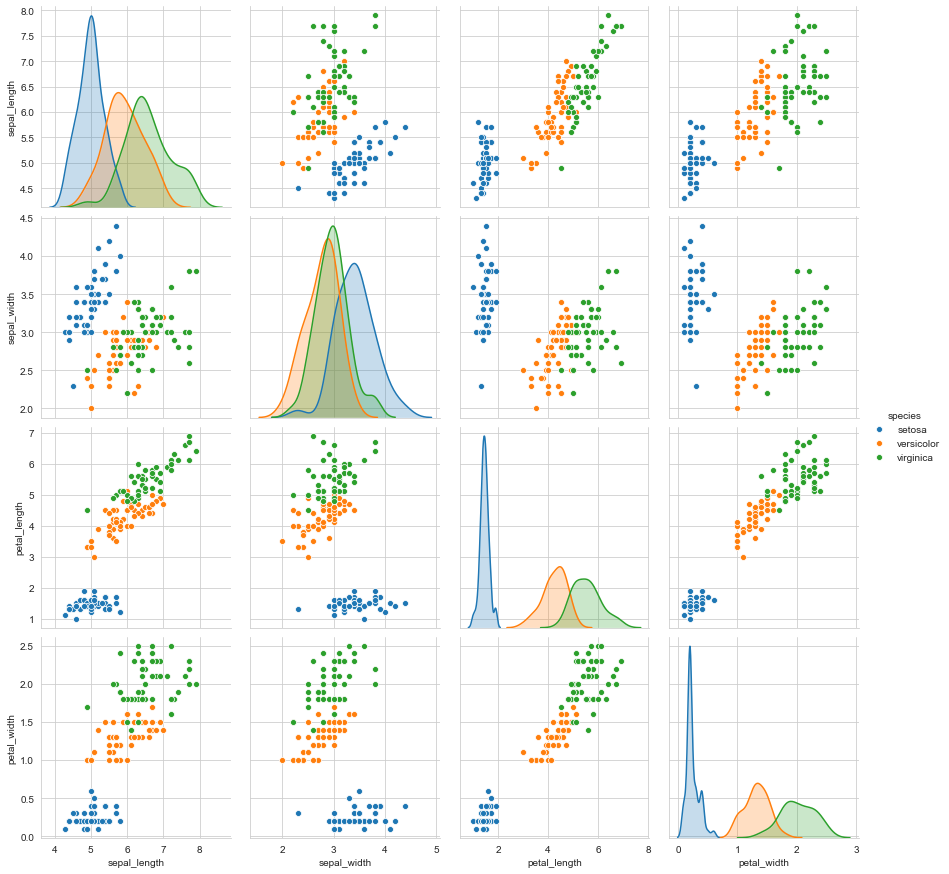

In [25]:

sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3);
plt.show()

Intentemos con la otra combinación!

![img](https://media0.giphy.com/media/j9djzcMmzg8ow/giphy.gif)

#Aquí sus códigos!

In [93]:
import pandas as pd
import seaborn as sns 
  
iris = sns.load_dataset('iris') 
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [94]:
import random
data_with_two_species = iris.iloc[50:150,:]
print(len(data_with_two_species))
print(type(data_with_two_species))
data_with_two_species

100
<class 'pandas.core.frame.DataFrame'>


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [95]:
from sklearn.utils import shuffle
data_with_two_species = shuffle(data_with_two_species)
data_with_two_species

,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica
130,7.4,2.8,6.1,1.9,virginica
138,6.0,3.0,4.8,1.8,virginica
75,6.6,3.0,4.4,1.4,versicolor
107,7.3,2.9,6.3,1.8,virginica
...,...,...,...,...,...
105,7.6,3.0,6.6,2.1,virginica
110,6.5,3.2,5.1,2.0,virginica
86,6.7,3.1,4.7,1.5,versicolor
62,6.0,2.2,4.0,1.0,versicolor


In [96]:
data_training = data_with_two_species.iloc[:90, :]
data_verification = data_with_two_species.iloc[:-10, :]

In [97]:
perceptron2 = Perceptron(5, ['versicolor', 'virginica'])

In [98]:
data_training = data_training.rename_axis('ID').values
print(data_training)

[[7.7 2.6 6.9 2.3 'virginica']
 [7.4 2.8 6.1 1.9 'virginica']
 [6.0 3.0 4.8 1.8 'virginica']
 [6.6 3.0 4.4 1.4 'versicolor']
 [7.3 2.9 6.3 1.8 'virginica']
 [5.4 3.0 4.5 1.5 'versicolor']
 [6.0 2.2 5.0 1.5 'virginica']
 [6.4 2.9 4.3 1.3 'versicolor']
 [6.5 3.0 5.8 2.2 'virginica']
 [5.7 2.8 4.1 1.3 'versicolor']
 [6.4 3.2 5.3 2.3 'virginica']
 [5.0 2.3 3.3 1.0 'versicolor']
 [6.1 3.0 4.6 1.4 'versicolor']
 [5.5 2.3 4.0 1.3 'versicolor']
 [6.3 2.7 4.9 1.8 'virginica']
 [6.9 3.1 5.1 2.3 'virginica']
 [6.8 3.0 5.5 2.1 'virginica']
 [6.3 3.3 4.7 1.6 'versicolor']
 [6.1 2.6 5.6 1.4 'virginica']
 [7.7 2.8 6.7 2.0 'virginica']
 [7.2 3.6 6.1 2.5 'virginica']
 [6.5 3.0 5.5 1.8 'virginica']
 [5.0 2.0 3.5 1.0 'versicolor']
 [6.8 3.2 5.9 2.3 'virginica']
 [6.3 2.3 4.4 1.3 'versicolor']
 [4.9 2.4 3.3 1.0 'versicolor']
 [6.4 3.1 5.5 1.8 'virginica']
 [6.9 3.1 5.4 2.1 'virginica']
 [5.8 2.7 3.9 1.2 'versicolor']
 [7.2 3.0 5.8 1.6 'virginica']
 [7.7 3.8 6.7 2.2 'virginica']
 [6.2 3.4 5.4 2.3 'virginic

In [99]:
perceptron2.train(data_training, epochs=1)
print('Final weights from training: {}'.format(perceptron2.weights))

Epoch 0
Adjusted weights: [4.774836456929325, 6.345310063333528, 2.4687113861723553, 1.6114454426774047, 5.267068890982131]
Adjusted weights: [3.774836456929325, -0.9546899366664716, -0.4312886138276446, -4.688554557322595, 3.467068890982131]
Adjusted weights: [4.774836456929325, 4.445310063333529, 2.5687113861723554, -0.18855455732259507, 4.967068890982131]
Adjusted weights: [3.774836456929325, -1.5546899366664713, 0.3687113861723552, -5.188554557322595, 3.467068890982131]
Adjusted weights: [4.774836456929325, 4.845310063333529, 3.268711386172355, -0.8885545573225953, 4.767068890982131]
Adjusted weights: [3.774836456929325, -1.654689936666471, 0.2687113861723551, -6.688554557322595, 2.5670688909821306]
Adjusted weights: [4.774836456929325, 4.045310063333529, 3.068711386172355, -2.5885545573225954, 3.8670688909821305]
Adjusted weights: [3.774836456929325, -2.354689936666471, -0.13128861382764523, -7.888554557322595, 1.5670688909821306]
Adjusted weights: [4.774836456929325, 2.6453100633

In [100]:
data_verification = data_verification.rename_axis('ID').values
print(data_verification)

[[7.7 2.6 6.9 2.3 'virginica']
 [7.4 2.8 6.1 1.9 'virginica']
 [6.0 3.0 4.8 1.8 'virginica']
 [6.6 3.0 4.4 1.4 'versicolor']
 [7.3 2.9 6.3 1.8 'virginica']
 [5.4 3.0 4.5 1.5 'versicolor']
 [6.0 2.2 5.0 1.5 'virginica']
 [6.4 2.9 4.3 1.3 'versicolor']
 [6.5 3.0 5.8 2.2 'virginica']
 [5.7 2.8 4.1 1.3 'versicolor']
 [6.4 3.2 5.3 2.3 'virginica']
 [5.0 2.3 3.3 1.0 'versicolor']
 [6.1 3.0 4.6 1.4 'versicolor']
 [5.5 2.3 4.0 1.3 'versicolor']
 [6.3 2.7 4.9 1.8 'virginica']
 [6.9 3.1 5.1 2.3 'virginica']
 [6.8 3.0 5.5 2.1 'virginica']
 [6.3 3.3 4.7 1.6 'versicolor']
 [6.1 2.6 5.6 1.4 'virginica']
 [7.7 2.8 6.7 2.0 'virginica']
 [7.2 3.6 6.1 2.5 'virginica']
 [6.5 3.0 5.5 1.8 'virginica']
 [5.0 2.0 3.5 1.0 'versicolor']
 [6.8 3.2 5.9 2.3 'virginica']
 [6.3 2.3 4.4 1.3 'versicolor']
 [4.9 2.4 3.3 1.0 'versicolor']
 [6.4 3.1 5.5 1.8 'virginica']
 [6.9 3.1 5.4 2.1 'virginica']
 [5.8 2.7 3.9 1.2 'versicolor']
 [7.2 3.0 5.8 1.6 'virginica']
 [7.7 3.8 6.7 2.2 'virginica']
 [6.2 3.4 5.4 2.3 'virginic

In [101]:
accuracy = perceptron2.verify(data_verification)
print('Error: {} %'.format(100-accuracy))

Error: 50.0 %


* Bravo Martínez Ariel Miguel - 10018737
* Ehrlich López Alexandra - 10018739
* Hernández Jaramillo Kevin - 10018742